In [25]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

from torch.utils.data import DataLoader

In [26]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [27]:
data = torch.tensor(iris[iris.columns[0:4]].values).float()

labels = torch.zeros(len(data), dtype=torch.long)
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

In [28]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, train_size=.8)

train_data = torch.utils.data.TensorDataset(train_data, train_labels)
test_data = torch.utils.data.TensorDataset(test_data, test_labels)

train_loader = DataLoader(train_data, shuffle=True, batch_size=12)
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

In [29]:
for x,y in train_loader:
    print(x.shape, y.shape)

torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])


In [33]:
def createANNmodel():
    ANNiris = nn.Sequential(
        nn.Linear(4,64),
        nn.ReLU(),
        nn.Linear(64,64),
        nn.ReLU(),
        nn.Linear(64,3)
    )
    
    lossfun = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(params=ANNiris.parameters(), lr=0.01)

    return ANNiris, lossfun, optimizer

In [38]:
numEpochs = 200

def trainTheModel():
    trainAcc = []
    testAcc = []


    for epochi in range(numEpochs):
        batchAcc = []

        for X, y in train_loader:
            yHat = ANNiris(X)

            loss = lossfun(yHat, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batchAcc.append(100*torch.mean((torch.argmax(yHat,axis=1)==y).float()).item())

        trainAcc.append(np.mean(batchAcc))

        X,y = next(iter(test_loader))

        predlabels = torch.argmax(ANNiris(X), axis=1)

        testAcc.append(100 * torch.mean((predlabels==y).float()).item())

    return trainAcc, testAcc
        

In [39]:
ANNiris, lossfun, optimizer = createANNmodel()

trainAcc, testAcc = trainTheModel()

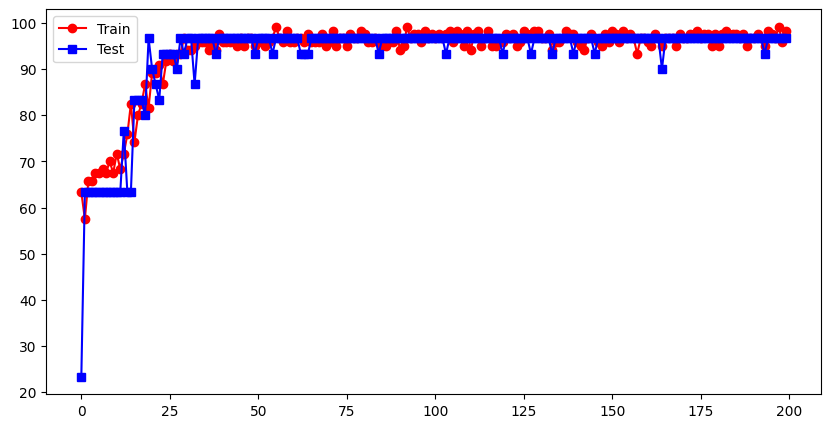

In [40]:
fig = plt.figure(figsize=(10,5))

plt.plot(trainAcc, 'ro-')
plt.plot(testAcc, 'bs-')

plt.legend(['Train', 'Test'])

plt.show()